### Multicollinearity & VIFs

Using the notebook here, answer the quiz questioons below regarding multicollinearity.

To get started let's read in the necessary libraries and the data that will be used.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('./house_prices.csv')
df.head()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.`Use [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) to look at pairwise relationships for all of the quantitative, explanatory variables in the dataset by running the cell below.  You might also investigate how to add color (**hue**) for the house style or neighborhood.  Use the plot to answer the first quiz questions below.

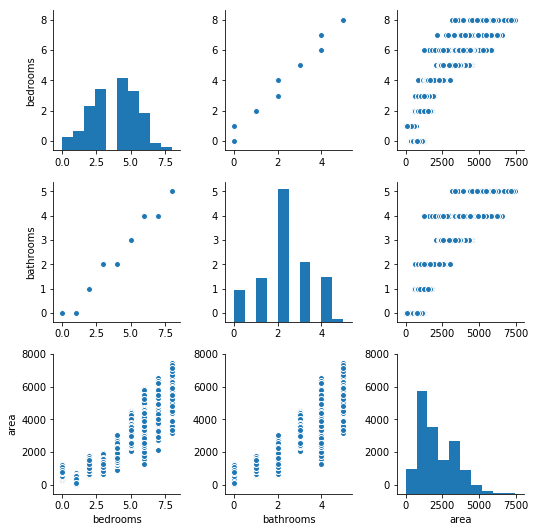

In [7]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area']]);

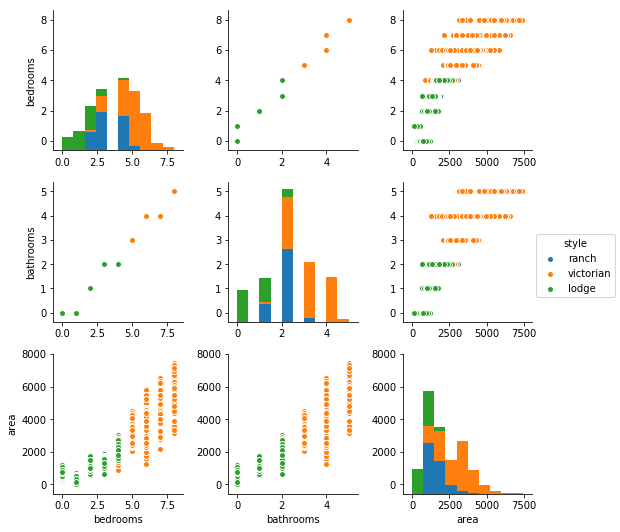

In [6]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area', 'style']], hue = 'style');

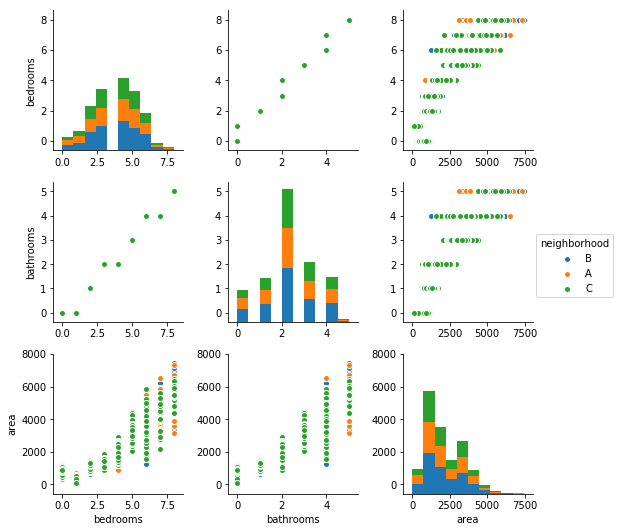

In [8]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area', 'neighborhood']], hue = 'neighborhood');


`2.` Earlier, you fit linear models between each individual predictor variable and price, as well as using all of the variables and the price in a multiple linear regression model. Each of the individual models showed a positive relationship - that is, when bathrooms, bedrooms, or area increase, we predict the price of a home to increase. 

Fit a linear model to predict a home **price** using **bedrooms**, **bathrooms**, and **area**. Use the summary to answer the second quiz question below. **Don't forget an intercept.**

In [9]:
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sat, 02 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:07:31   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` Calculate the VIFs for each variable in your model.  Use quiz 3 below to provide insights about the results of your VIFs.  [Here](https://etav.github.io/python/vif_factor_python.html) is the helpful post again, in case you need it!

In [12]:
y, X = dmatrices('price ~  area + bedrooms + bathrooms', df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [13]:
vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


`4.` Remove bathrooms from your above model.  Refit the multiple linear regression model and re-compute the VIFs.  Use the final quiz below to provide insights about your results.

In [14]:
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Sat, 02 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:09:38   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
y, X = dmatrices('price ~  area + bedrooms', df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


Based on the scatterplot matrix in the first question:

- It appears that the predictor variables are correlated with one another.

- The variables that appear to be most correlated are the number of bedrooms and bathrooms.

From the first linear model:

- As the number of bathrooms increases, we predict the price to increase.

- As the area of the home increases, we predict the price to increase.

Based on the VIFs:

- We should remove either bedrooms or bathrooms, because they both have VIFs greater than 10.

After removing bathrooms: 

- All VIFs are now below 10.

- All of the coefficients are now positive, as we would expect.

- To three digits the Rsquared value stayed the same, suggesting we didn't really need both bedrooms and bathrooms in the model.